#Build Naive Bayes, SVM, Decision Tree, Boosted Tree, Random Forest, and ANN classifiers to predict positive/negative sentiment for a coffee maker.

1. Preprocess data. Create a label column based on the product ratings. Negative sentiment is the outcome of interest. Ratings 1-3 -> negative sentiment. Ratings 4-5 -> positive sentiment. Assess label class distribution. (2 pts.)

2. Build feature representations of the reviews. Transform all words to lower case, exclude English stopwords, develop TFIDF transformed feature representation. (2 pts.)

3. Develop the classifiers to predict review sentiment. Evaluate average precision, recall, F1, ROC AUC, and PR AUC. (12 pts.)

4. Identify the best performing model. Explain your choice of metric. (4 pts.)

<p>
Submit LastnameFirstname-A4.ipynb


# 1. Preprocess data. Create a label column based on the product ratings. Negative sentiment is the outcome of interest. Ratings 1-3 -> negative sentiment. Ratings 4-5 -> positive sentiment. Assess label class distribution.

In [ ]:
import pandas as pd

ratings = pd.read_csv('coffee_maker.csv')

In [ ]:
ratings.head()

,review_date,handle,rating,helpfulness_rating,review
0,"April 14, 2018",The Dolphin,2.0,513,Delightful coffee maker if you’re only looking...
1,"February 7, 2019",Karen Kaffenberger,1.0,122,UPDATE: Bought this 10-21-18 and I finally ret...
2,"December 23, 2017",C1C3C11,4.0,185,The big reason I ordered this was because I wa...
3,"November 26, 2016",Paul Roberts,5.0,224,I've owned several of their older brewstation ...
4,"November 28, 2017",JennyD,3.0,116,I agonized over which coffee maker to purchase...


In [ ]:
ratings.drop(['review_date', 'handle', 'helpfulness_rating'], axis=1, inplace=True)
ratings['sentiment'] = ratings['rating'].replace({1:1, 2:1, 3:1, 4:0, 5:0})

Negative sentiment proportion:  0.4128


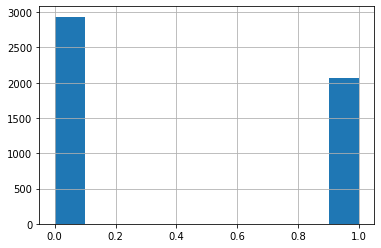

In [ ]:
ratings.sentiment.hist()

print('Negative sentiment proportion: ', ratings.sentiment.mean())

**Upon re-labeling and replacing sentiment scores of either 0 or 1, it was identified that 41.28% of the data reflected Negative rating scores. The Negative rating scores (or Class 1) is the outcome class of interest because the negative sentiments will reflect where the root of information regarding product improvement and development will come from.**

# 2. Build feature representations of the reviews. Transform all words to lower case, exclude English stopwords, develop TFIDF transformed feature representation.

                   &   
# 3. Develop the classifiers to predict review sentiment. Evaluate average precision, recall, F1, ROC AUC, and PR AUC.

In [ ]:
from sklearn.model_selection import train_test_split

X = ratings['review'].values.astype(str)
y = ratings['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, recall_score, precision_score, f1_score, roc_curve, auc, precision_recall_curve


names = ['Logistic Regression', 'Naive Bayes', 'SVM', 'Decision Tree', 
         'Random Forest','Boosted Tree', 'Neural Network']

classifiers = [LogisticRegression(),
               MultinomialNB(),
               SVC(probability=True),
               DecisionTreeClassifier(max_depth=5),
               RandomForestClassifier(max_depth=5, n_estimators=10),
               AdaBoostClassifier(),
               MLPClassifier(alpha=1, max_iter=1000)
               ]

for name, classifier in zip(names, classifiers):
  classifier_pipe = Pipeline([
                            ('tfidf', TfidfVectorizer(lowercase=True, stop_words={'english'})),
                            (name, classifier),
                            ])
  
  classifier_pipe.fit(X_train, y_train)
  pred = classifier_pipe.predict(X_test)
  pred_prob = classifier_pipe.predict_proba(X_test)[:, 1]

  fpr, tpr, thresholds = roc_curve(y_test, pred_prob)
  precision, recall, thresholds_pr = precision_recall_curve(y_test, pred)

  print(name, '\n')
  print(classification_report(y_test, pred))
  print('ROC AUC: ', auc(fpr, tpr))
  print('Precision/Recall AUC: ', auc(precision, recall))
  print('\n')

Logistic Regression 

              precision    recall  f1-score   support

         0.0       0.86      0.92      0.89       935
         1.0       0.89      0.80      0.84       715

    accuracy                           0.87      1650
   macro avg       0.87      0.86      0.86      1650
weighted avg       0.87      0.87      0.87      1650

ROC AUC:  0.9403896638121236
Precision/Recall AUC:  0.4532092533947248


Naive Bayes 

              precision    recall  f1-score   support

         0.0       0.78      0.96      0.86       935
         1.0       0.93      0.65      0.77       715

    accuracy                           0.83      1650
   macro avg       0.86      0.81      0.82      1650
weighted avg       0.85      0.83      0.82      1650

ROC AUC:  0.9312501402340976
Precision/Recall AUC:  0.433995337995338


SVM 

              precision    recall  f1-score   support

         0.0       0.87      0.92      0.89       935
         1.0       0.89      0.82      0.85       

**Based on the chosen thresholds, the Logistic Regression model's results are as follows:**

This model is able to identify 80% of Negative ratings (recall of Class 1). Of those, 89% of them are actually Negative (precision of Class 1).

The F1 scores are the harmonic averages of Positive and Negative sentiments. Both produced verily high scores of 89% and 84%, respectively.

The ROC AUC plots the distribution of True Positive cases vs. False Positive cases throughout different levels of thresholds. With a high ROC AUC score of 94%, the interpretation is that the model performs very well at distinguishing between positive and negative cases.

With a precision/recall AUC of 45%, this model does suggest to have predicted value, however, the default threshold should be addressed to attain an improved level of model performance.

**Based on the chosen thresholds, the Naive Bayes model's results are as follows:**

This model is able to identify 65% of Negative ratings (recall of Class 1). Of those, 93% of them are actually Negative (precision of Class 1).

The F1 scores are the harmonic averages of Positive and Negative sentiments. Both produced verily high scores of 86% and 77%, respectively.

The ROC AUC plots the distribution of True Positive cases vs. False Positive cases throughout different levels of thresholds. With a high ROC AUC score of 93%, the interpretation is that the model performs very well at distinguishing between positive and negative cases.

With a precision/recall AUC of 43.3%, this model does suggest to have predicted value, however, the default threshold should be addressed to attain an improved level of model performance.

**Based on the chosen thresholds, the SVM model's results are as follows:**

This model is able to identify 82% of Negative ratings (recall of Class 1). Of those, 89% of them are actually Negative (precision of Class 1).

The F1 scores are the harmonic averages of Positive and Negative sentiments. Both produced verily high scores of 89% and 85%, respectively.

The ROC AUC plots the distribution of True Positive cases vs. False Positive cases throughout different levels of thresholds. With a high ROC AUC score of 94.6%, the interpretation is that the model performs very well at distinguishing between positive and negative cases.

With a precision/recall AUC of 45.9%, this model does suggest to have predicted value, however, the default threshold should be addressed to attain an improved level of model performance.

**Based on the chosen thresholds, the Decision Tree model's results are as follows:**

This model is able to identify 87% of Negative ratings (recall of Class 1). Of those, 59% of them are actually Negative which is not very good (precision of Class 1).

The F1 scores are the harmonic averages of Positive and Negative sentiments. Both produced verily high scores of 66% and 70%, respectively.

The ROC AUC plots the distribution of True Positive cases vs. False Positive cases throughout different levels of thresholds. With a ROC AUC score of 76.9%, the interpretation is that the model is decent at distinguishing between positive and negative cases.

With a precision/recall AUC of 32.5%, this model suggests to have low predicted value and the default threshold should be addressed to attain an improved level of model performance.

**Based on the chosen thresholds, the Random Forest model's results are as follows**:

This model is able to identify 26% of Negative ratings which is very poor (recall of Class 1). Of those, 86% of them are actually Negative (precision of Class 1). With results like these, it is implied that the Random Forest model will not turn out to be useful in this particular business case.

The F1 scores are the harmonic averages of Positive and Negative sentiments. Both produced verily high scores of 76% and 40%, respectively. This indicates the class of interest suffer significantly with model identification.

The ROC AUC plots the distribution of True Positive cases vs. False Positive cases throughout different levels of thresholds. With ROC AUC score of 78.9%, the interpretation is that the model is decent at distinguishing between positive and negative cases.

With a precision/recall AUC of 28.6, this model has the lowest predicted value among all models analyzed.

**Based on the chosen thresholds, the Boosted Tree model's results are as follows:**

This model is able to identify 71% of Negative ratings (recall of Class 1). Of those, 83% of them are actually Negative (precision of Class 1).

The F1 scores are the harmonic averages of Positive and Negative sentiments. Both produced verily high scores of 84% and 77%, respectively.

The ROC AUC plots the distribution of True Positive cases vs. False Positive cases throughout different levels of thresholds. With a high ROC AUC score of 88.9%, the interpretation is that the model performs very well at distinguishing between positive and negative cases.

With a precision/recall AUC of 40%, this model does suggest to have predicted value, however, the default threshold should be addressed to attain an improved level of model performance.

**Based on the chosen thresholds, the Neural Network model's results are as follows:**

This model is able to identify 82% of Negative ratings (recall of Class 1). Of those, 88% of them are actually Negative (precision of Class 1).

The F1 scores are the harmonic averages of Positive and Negative sentiments. Both produced verily high scores of 89% and 84%, respectively.

The ROC AUC plots the distribution of True Positive cases vs. False Positive cases throughout different levels of thresholds. With a high ROC AUC score of 94%, the interpretation is that the model performs very well at distinguishing between positive and negative cases.

With a precision/recall AUC of 45%, this model does suggest to have predicted value, however, the default threshold should be addressed to attain an improved level of model performance.

# 4. Identify the best performing model. Explain your choice of metric.

**The best performing model was the SVM model which performed just slightly better than the Neural Network. While both model's had Recall scores of 82%, the SVM model's Precision score was slightly higher than the Neural Network's precision score 89% vs. 88%.**

**With the same Recall score for both Positive and Negative sentiment cases, the distinguishing stat between these two models is in their Precision. As a result, the SVM holds the superior F1 scores of 89% for Positive sentiment cases and 85% for Negative sentiment cases.**

**Being that this business cases relies on the Negative sentiment cases for feedback on product improvement and product development, high identification stats for class 1 in particular is the prevailing reason why the SVM model is best in this particular business problem.**